In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Sales_Data=pd.read_csv(r"C:\Users\vivek\Downloads\Untitled Folder\Week 7\Sales_add.csv")

In [7]:
Sales_Data.shape

(22, 5)

In [4]:
Sales_Data.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [5]:
Sales_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


# The company wishes to clarify whether there is any increase in sales after
stepping into digital marketing.

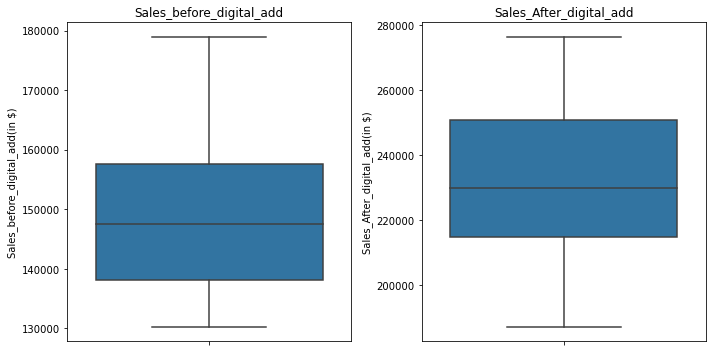

In [30]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(data=Sales_Data,y="Sales_before_digital_add(in $)")
plt.title("Sales_before_digital_add")
plt.subplot(1,2,2)
sns.boxplot(data=Sales_Data,y="Sales_After_digital_add(in $)")
plt.title("Sales_After_digital_add")
plt.tight_layout()

In [ ]:
Data shows that there is a difference in total sales before and after digital marketing

Setting Hypothesis
H0 : There is no increase in sales after stepping into marketing
Ha : There is an increase in sales after stepping into marketing

In [13]:
# import ttest module
from scipy.stats import ttest_rel

#Assuming alpha=0.05
alpha=0.05

In [19]:
sales_before=Sales_Data['Sales_before_digital_add(in $)']
sales_after=Sales_Data['Sales_After_digital_add(in $)']

_,p = ttest_rel( sales_after,sales_before, alternative = 'greater' )

print("Value of p" ,p)

Value of p 3.168333502287889e-11


In [20]:
if p> alpha:
    print ('fail to reject the Null Hypothesis,H0')
else:
    print('Reject the Null Hypothesis,H0')

Reject the Null Hypothesis,H0


In [ ]:
From the above t test we fail to reject the Null Hypothesis. 
Hence we accept the null Hypothesis we can conclude that there is an increase in sales after stepping into digital marketing.

# The company needs to check whether there is any dependency between the
features “Region” and “Manager”.


Setting Hypothesis
H0 : There is no dependance between the features “Region” and “Manager”.
Ha : There is dependance between the features “Region” and “Manager”.

In [21]:
CT = pd.crosstab(Sales_Data['Region'], Sales_Data['Manager'])
CT

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


In [23]:
alpha=.05
from scipy.stats import chi2_contingency
_, p, _, _ = chi2_contingency(CT)
print("Value of p" ,p)

Value of p 0.5493991051158094


In [24]:
if p> alpha:
    print ('fail to reject the Null Hypothesis,H0')
else:
    print('Reject the Null Hypothesis,H0')

fail to reject the Null Hypothesis,H0


Hence there is no dependance between the features “Region” and “Manager”.